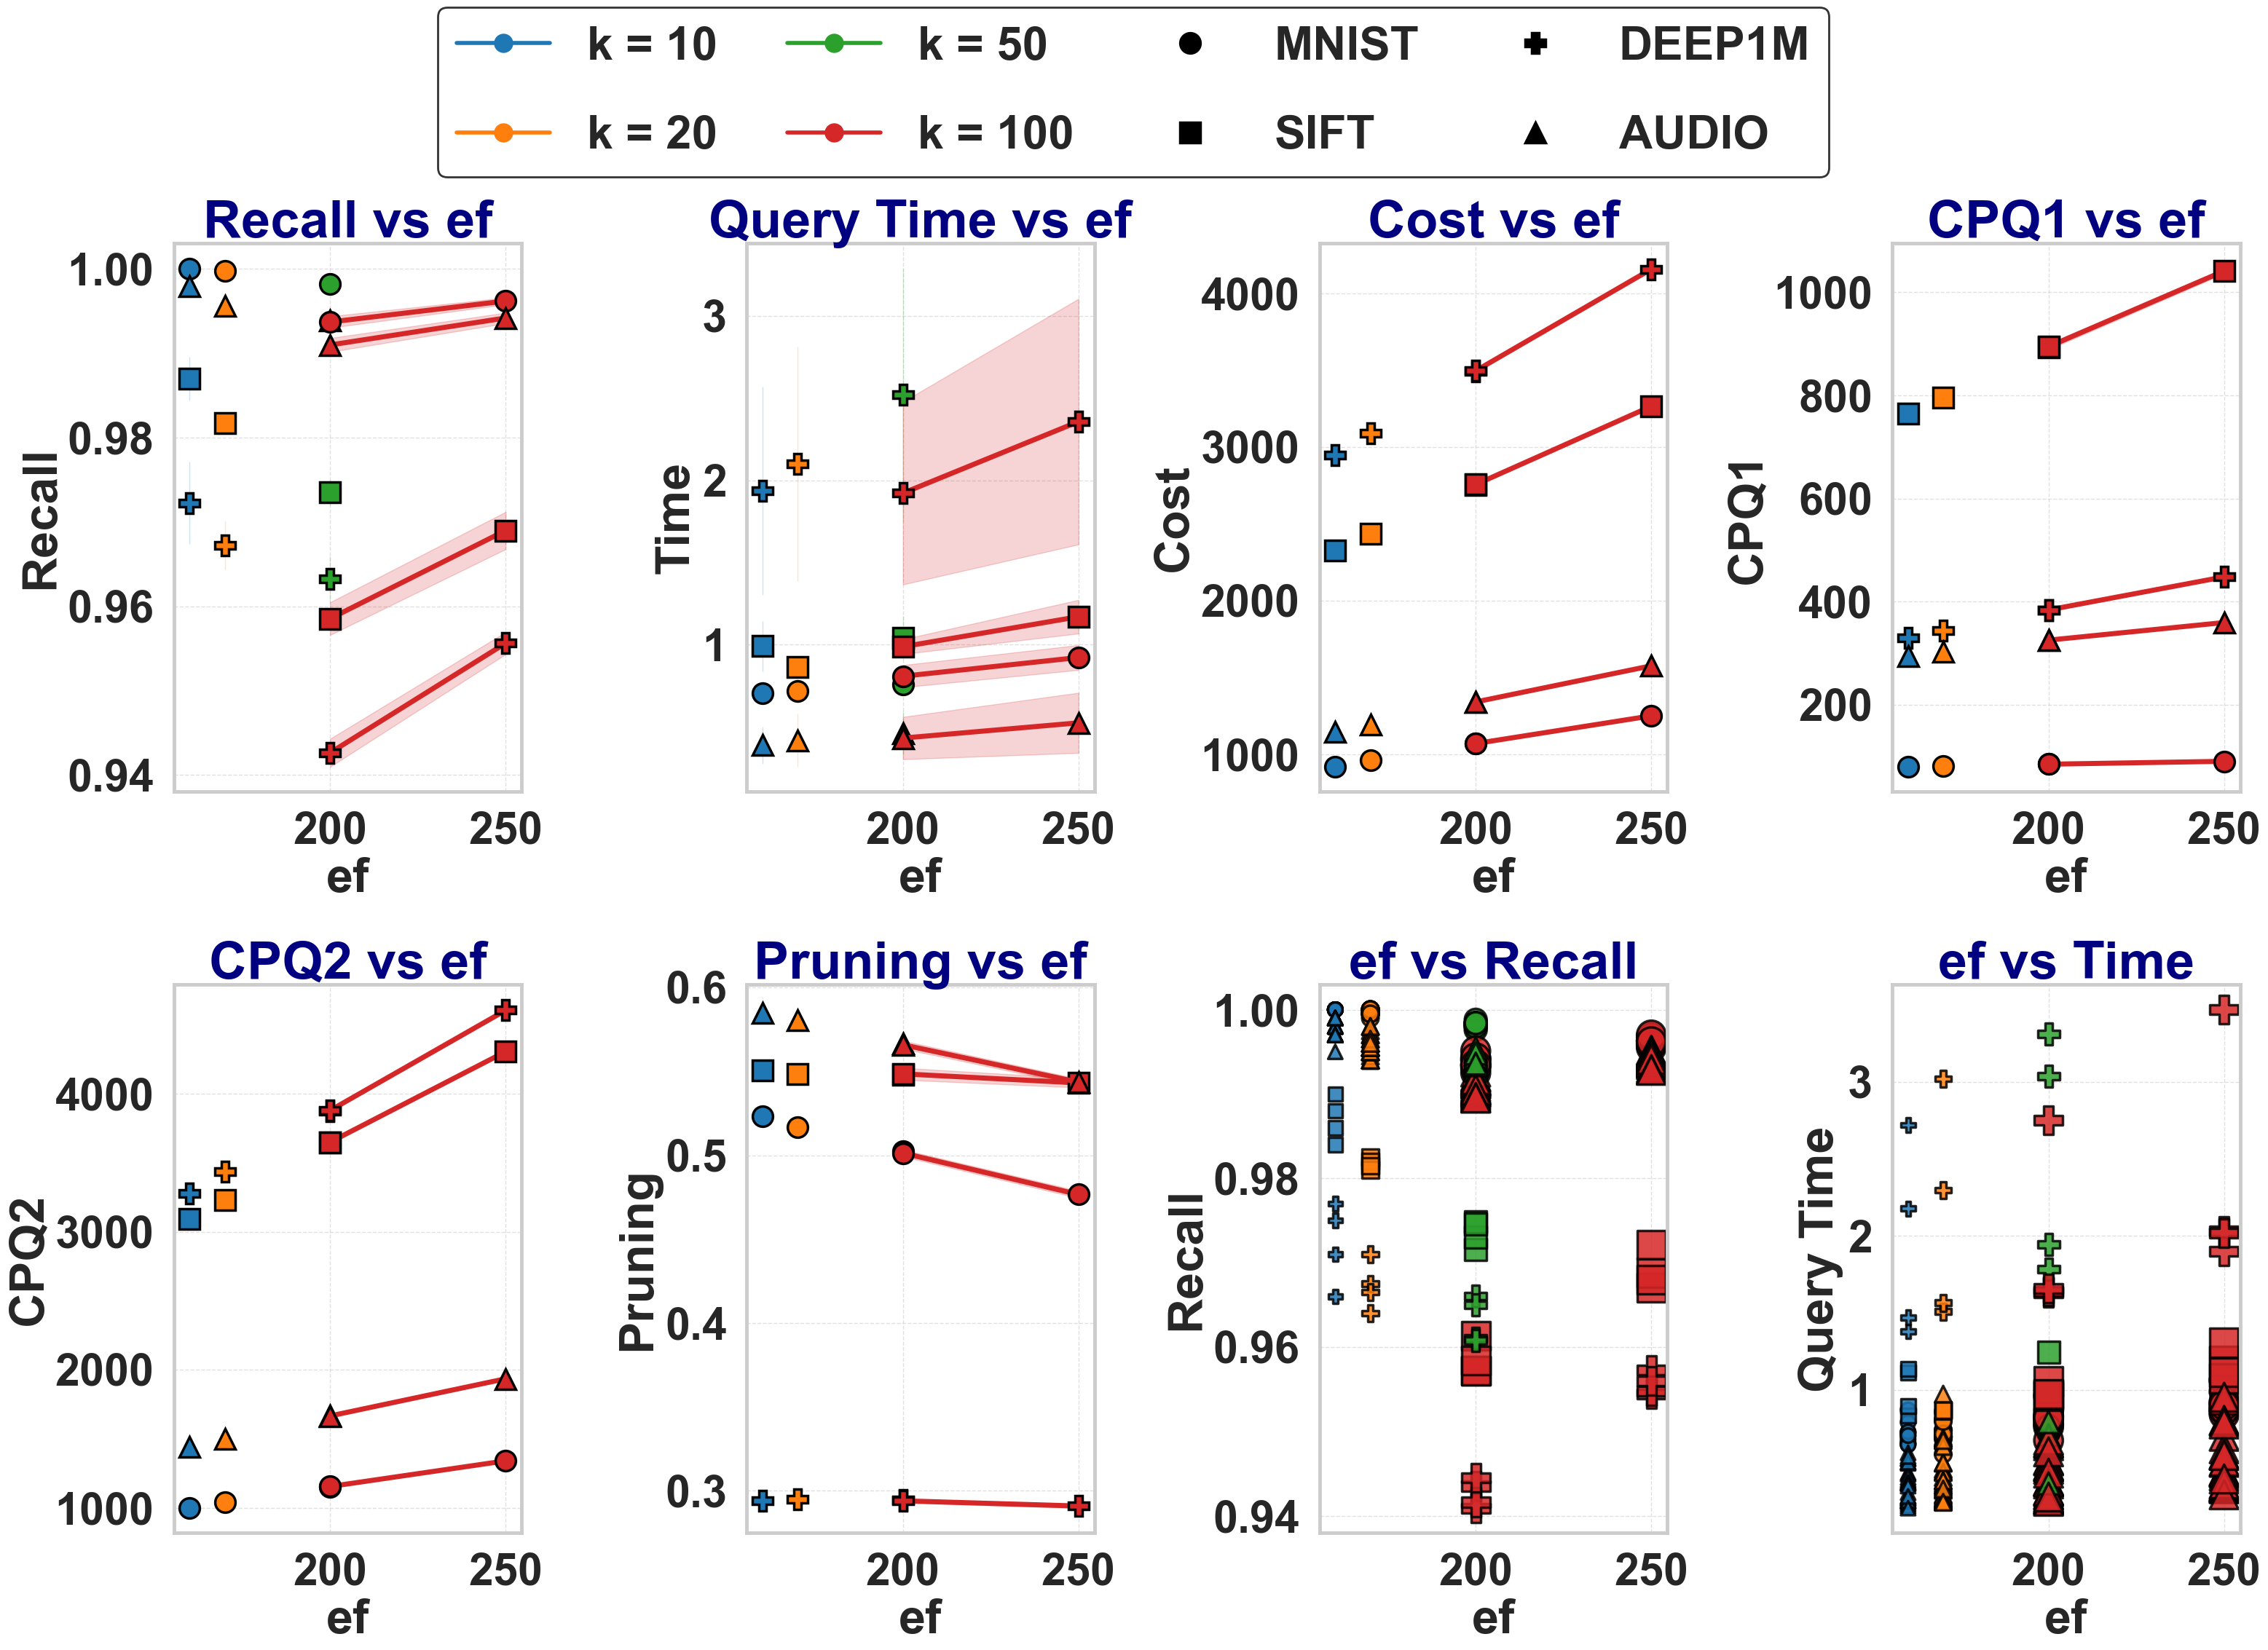

In [1]:

def load_dap_results(file_path, dataset_name):
    with open(file_path, "r", encoding="utf-8") as f:
        log_text = f.read()

    pattern = re.compile(
        r"DAP_k(?P<k>\d+)_th[\d.]+\s+(?P<k2>\d+)\s+(?P<ef>\d+)\s+(?P<Time>[\d.]+)\s+"
        r"(?P<Recall>[\d.]+)\s+(?P<Cost>[\d.]+)\s+(?P<CPQ1>[\d.]+)\s+"
        r"(?P<CPQ2>[\d.]+)\s+(?P<Pruning>[\d.]+)"
    )

    records = []
    for match in pattern.finditer(log_text):
        rec = match.groupdict()
        for key in ['k', 'k2', 'ef']:
            rec[key] = int(rec[key])
        for key in ['Time', 'Recall', 'Cost', 'CPQ1', 'CPQ2', 'Pruning']:
            rec[key] = float(rec[key])
        records.append(rec)

    df = pd.DataFrame(records)
    df = df[df['k'] == df['k2']]
    df.drop(columns=['k2'], inplace=True)
    df['Dataset'] = dataset_name
    return df

files = {
    "MNIST":  "indexes/mnist_result.txt",
    "SIFT":   "indexes/sift_result.txt",
    "DEEP1M": "indexes/deep1m_result.txt",
    "AUDIO":  "indexes/audio_result.txt",
}

marker_edge_width = 2.5
